In [8]:
from gensim.models import FastText
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
from string import punctuation

In [9]:
# Load model
# Load the pre-trained FastText model
model = FastText.load("shona_fasttext_50d.model")

In [3]:
print(model)

FastText(vocab=107228, vector_size=50, alpha=0.025)


In [20]:
normed_vector = model.wv.get_vector("baba", norm=True)
normed_vector

array([ 0.12694322,  0.07500106,  0.12631156, -0.04586631, -0.04868254,
        0.03402508, -0.06310038, -0.22078694, -0.21315102, -0.1385409 ,
       -0.08130909,  0.01712037,  0.00082262,  0.1144122 , -0.08897744,
        0.06036587, -0.01094372, -0.04460265,  0.02624194, -0.02349709,
       -0.2157254 , -0.1279458 ,  0.11800685,  0.17434277,  0.21540494,
       -0.03997247,  0.07399303,  0.02664708,  0.04788842,  0.0707145 ,
        0.1012168 , -0.17522267,  0.01179009, -0.00324907,  0.21237735,
       -0.18660948, -0.09451319,  0.03652973,  0.04196132,  0.06683815,
       -0.08080963,  0.19009183,  0.19420347, -0.19389336, -0.06921295,
       -0.22054118, -0.36662328, -0.26440015, -0.03413467,  0.3482807 ],
      dtype=float32)

In [6]:
# Test similarity
similar_words = model.wv.most_similar("kutaura", topn=5)
print(similar_words)


[('kushamiswa', 0.7706368565559387), ('kutaurira', 0.769014298915863), ('kungotaura', 0.7551091909408569), ('kungotaurawo', 0.748419463634491), ('kutaurawo', 0.7469412684440613)]


In [23]:
# Function to generate embeddings for a given word
def generate_embedding(word):
    try:
        embedding = model.wv[word]
        return embedding
    except KeyError:
        print(f"Word '{word}' not found in the vocabulary.")
        return None

# Example usage
word = "baba"
embedding = generate_embedding(word)
if embedding is not None:
    print(f"Embedding for '{word}':", embedding)

Embedding for 'baba': [ 0.552565    0.3264685   0.5498155  -0.19964926 -0.2119079   0.1481061
 -0.27466658 -0.9610528  -0.9278148  -0.60304797 -0.35392636  0.07452245
  0.00358075  0.4980193  -0.3873056   0.26276368 -0.04763639 -0.19414872
  0.11422727 -0.10227935 -0.93902063 -0.556929    0.5136663   0.7588882
  0.9376257  -0.17399421  0.32208067  0.11599078  0.20845118  0.30780968
  0.4405817  -0.76271826  0.05132053 -0.01414272  0.92444706 -0.81228334
 -0.41140184  0.15900852  0.18265137  0.29093656 -0.35175234  0.8274415
  0.8453388  -0.843989   -0.30127367 -0.959983   -1.5958567  -1.1508946
 -0.14858314  1.5160142 ]


In [24]:
import re
from gensim.models import FastText
import numpy as np



# Define the GPT-2 tokenization pattern
GPT2_SPLIT_PATTERN = r"""'(?:[sdmt]|ll|ve|re)| ?[a-zA-Z]+| ?[0-9]+| ?[^\s\w]+|\s+(?!\S)|\s+"""

# Function to tokenize a sentence using the given pattern
def tokenize_sentence(sentence, pattern):
    tokens = re.findall(pattern, sentence)
    return [token.strip() for token in tokens if token.strip()]

# Function to generate embeddings for words in a sentence
def generate_embeddings_for_sentence(sentence, model, pattern):
    tokens = tokenize_sentence(sentence, pattern)
    embeddings = []
    for token in tokens:
        if token in model.wv:
            embeddings.append(model.wv[token])
    if not embeddings:
        print("None of the words in the sentence are in the vocabulary.")
    return embeddings

# Example usage
sentences = [
    "Ndakanganwa kushandisa tsamba.",
    "Vatengesi vachabvunza ko ndikati kune zvaitwa sei.",
    "Munhu wese anorwadziwa nemutupo wake.",
    "Mudzidzisi anorwadziwa nengirozi yake kune yedu."
]

for sentence in sentences:
    print("Sentence:", sentence)
    word_embeddings = generate_embeddings_for_sentence(sentence, model, GPT2_SPLIT_PATTERN)
    if word_embeddings:
        print("Embeddings for words in the sentence:")
        for word, embedding in zip(tokenize_sentence(sentence, GPT2_SPLIT_PATTERN), word_embeddings):
            print(f"\t{word}: {embedding}")


Sentence: Ndakanganwa kushandisa tsamba.
Embeddings for words in the sentence:
	Ndakanganwa: [ 0.03009197 -0.13062145  0.12644638 -0.04077367 -0.16770773 -0.03909929
  0.61177605 -0.2980716  -0.381827    0.5352361  -0.18716507 -0.5672541
  0.32401004  0.01221917 -0.31774318 -0.05692827  0.2557482   0.14748138
 -0.00819545 -0.01216372  0.01273371 -0.73280156  0.3290436  -0.11633662
  0.5631776   0.4493094   0.04626599 -0.53889143  0.20818871 -0.43546963
  0.11975758 -0.37782896  0.6777281   0.5698752   0.00269621 -0.51186734
 -0.35704935 -0.42260015  0.187949   -0.34017244 -0.0021306   0.19654167
  0.41382745 -0.636411   -0.07520644 -0.60327196 -0.23389171 -0.4271142
  0.3907566   0.20353974]
	kushandisa: [-0.41028827 -0.329545    0.11068455 -0.03628904  0.5987615   0.5041354
  0.2993329   0.00534615  0.26151845  0.7343734  -0.30558738 -0.24025562
 -0.72723335  0.31499863 -0.6281841  -0.32758382 -0.20452274  0.23820212
  0.01292126  0.06968886  0.5119832  -0.33474746  0.70690125  0.3767

In [25]:
import re
from gensim.models import FastText
import numpy as np


# Define the GPT-2 tokenization pattern
GPT2_SPLIT_PATTERN = r"""'(?:[sdmt]|ll|ve|re)| ?[a-zA-Z]+| ?[0-9]+| ?[^\s\w]+|\s+(?!\S)|\s+"""

# Function to tokenize a sentence using the given pattern
def tokenize_sentence(sentence, pattern):
    tokens = re.findall(pattern, sentence)
    return [token.strip() for token in tokens if token.strip()]

# Function to generate embeddings for words in a sentence
def generate_sentence_embedding(sentence, model, pattern):
    tokens = tokenize_sentence(sentence, pattern)
    word_embeddings = []
    for token in tokens:
        if token in model.wv:
            word_embeddings.append(model.wv[token])
    if not word_embeddings:
        print("None of the words in the sentence are in the vocabulary.")
        return None
    sentence_embedding = np.mean(word_embeddings, axis=0)
    return sentence_embedding

# Example usage
sentences = [
    "Ndakanganwa kushandisa tsamba.",
    "Vatengesi vachabvunza ko ndikati kune zvaitwa sei.",
    "Munhu wese anorwadziwa nemutupo wake.",
    "Mudzidzisi anorwadziwa nengirozi yake kune yedu."
]

for sentence in sentences:
    print("Sentence:", sentence)
    sentence_embedding = generate_sentence_embedding(sentence, model, GPT2_SPLIT_PATTERN)
    if sentence_embedding is not None:
        print("Embedding for the sentence:", sentence_embedding)


Sentence: Ndakanganwa kushandisa tsamba.
Embedding for the sentence: [-0.14047225 -0.23803316  0.16619895  0.18379292  0.06871925  0.13445544
  0.22338822 -0.22578679 -0.21422876  0.34511048  0.0599229  -0.40088743
 -0.17040226  0.13033645 -0.07804136 -0.18858819 -0.04244602  0.05374519
  0.06739435 -0.02758298  0.3171039  -0.41982523  0.223082    0.34056607
 -0.3340216   0.5513506   0.14265826 -0.05882733  0.32952103 -0.09812839
 -0.07610563 -0.4005863   0.49155954  0.32203057  0.12216822 -0.43812555
 -0.18406293 -0.3086537  -0.0376423  -0.5159034  -0.19468534  0.28031725
  0.28639987 -0.4498237   0.07487646 -0.6891132  -0.02111763 -0.25346535
  0.24141502  0.18437183]
Sentence: Vatengesi vachabvunza ko ndikati kune zvaitwa sei.
Embedding for the sentence: [ 0.32323492  0.2624618   0.5196585  -0.30840778  0.11165506  0.16689028
 -0.03835896 -0.22733784 -0.48162264  0.08200148  0.34084886  0.03904125
 -0.10779394 -0.09956083 -0.14196527 -0.00401335 -0.20138554  0.02228521
  0.2466386  

In [26]:
# Define the GPT-2 tokenization pattern
GPT2_SPLIT_PATTERN = r"""'(?:[sdmt]|ll|ve|re)| ?[a-zA-Z]+| ?[0-9]+| ?[^\s\w]+|\s+(?!\S)|\s+"""

# Function to tokenize a sentence using the given pattern
def tokenize_sentence(sentence, pattern):
    tokens = re.findall(pattern, sentence)
    return [token.strip() for token in tokens if token.strip()]

# Function to generate embeddings for words in a sentence
def generate_sentence_embedding(sentence, model, pattern):
    tokens = tokenize_sentence(sentence, pattern)
    word_embeddings = []
    for token in tokens:
        if token in model.wv:
            word_embeddings.append(model.wv[token])
    if not word_embeddings:
        print("None of the words in the sentence are in the vocabulary.")
        return None
    sentence_embedding = np.mean(word_embeddings, axis=0)
    return sentence_embedding

# Function to generate embeddings for sentences
def generate_sentence_embeddings(sentences, model, pattern):
    sentence_embeddings = []
    for sentence in sentences:
        embedding = generate_sentence_embedding(sentence, model, pattern)
        if embedding is not None:
            sentence_embeddings.append(embedding)
    return np.array(sentence_embeddings)

# Define Shona sentences in lists a and b
a = [
    "ndakuenda kuno gara kunyika?",
    "Pasi  pano pisa zvisingaite?",
    "sekuru ndivo vakenda kumombe vega?",
    "jesu ndiye mwanakona wamwari?",
    "Maimboona vasikana vano taurisa here?"
]

b = [
    "mwari ndiye akasika denga nenyika?",
    "pasi pane zuva raka wandisa?",
    "nezuro ndakaenda kumombe ndega",
    "mwari vakasika vanhu nemu fananidzo wedu?",
    "vasikana vane makuhwa vava?"
]

# Calculate cosine similarity between Shona sentences in a and b
embeddings_a = generate_sentence_embeddings(a, model, GPT2_SPLIT_PATTERN)
embeddings_b = generate_sentence_embeddings(b, model, GPT2_SPLIT_PATTERN)

similarity_matrix = cosine_similarity(embeddings_a, embeddings_b)

# Find the most similar sentence pairs
for i in range(len(a)):
    j = similarity_matrix[i].argmax()
    similarity_score = similarity_matrix[i][j]
    sentence_a = a[i]
    sentence_b = b[j]
    print("Similarity between sentence '{}' and '{}': {:.2f}".format(sentence_a, sentence_b, similarity_score))

Similarity between sentence 'ndakuenda kuno gara kunyika?' and 'nezuro ndakaenda kumombe ndega': 0.72
Similarity between sentence 'Pasi  pano pisa zvisingaite?' and 'pasi pane zuva raka wandisa?': 0.77
Similarity between sentence 'sekuru ndivo vakenda kumombe vega?' and 'vasikana vane makuhwa vava?': 0.79
Similarity between sentence 'jesu ndiye mwanakona wamwari?' and 'mwari ndiye akasika denga nenyika?': 0.80
Similarity between sentence 'Maimboona vasikana vano taurisa here?' and 'vasikana vane makuhwa vava?': 0.84


In [27]:
from gensim.models.fasttext import load_facebook_model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Perform Analogical Reasoning
def perform_analogical_reasoning(model, a, b, c, topn=5):
    # Calculate the vector d as b - a + c
    d = model.wv[b] - model.wv[a] + model.wv[c]
    
    # Find the words that best complete the analogy
    closest_words = model.wv.similar_by_vector(d, topn=topn + 3)  # Add extra to ensure we get at least topn unique words
    result_words = [word for word, _ in closest_words if word not in [a, b, c]]
    
    # Ensure we return exactly 'topn' words
    return result_words[:topn]

# Example usage
a = "murume"  # man
b = "sekuru"   # king
c = "mukadzi" # woman

predicted_words = perform_analogical_reasoning(model, a, b, c)
if predicted_words:
    print(f"{a} is to {b} as {c} is to: {', '.join(predicted_words)}")
else:
    print("No suitable words found.")

murume is to sekuru as mukadzi is to: sasekuru, kambuya, kunasekuru, anasekuru, vatete


In [35]:
import re

def preprocess_shona_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert numerals to words (if necessary)
    # text = re.sub(r'\d+', lambda x: num2words(int(x.group())), text)

    # Lowercase
    text = text.lower()

    # Tokenization (split text into words)
    tokens = re.findall(r'\b\w+\b', text)

    # Stemming (remove suffixes and prefixes)
    # Example: Convert "kuvataura" to "vataura" (talk)
    # Stemming in Shona can be complex and may require a dictionary-based approach
    # Stemming can also be language-specific, so consider using a library or dictionary tailored for Shona
    # For simple stemming, you can remove known prefixes and suffixes using regular expressions

    # Extract character n-grams
    # Example: Convert "musha" to ["mu", "ush", "sha"]
    # This helps handle rare or misspelled words
    char_ngrams = [text[i:i+n] for i in range(len(text)) for n in range(1, 4)]

    # Return preprocessed tokens and character n-grams
    return tokens, char_ngrams

# Example usage
text = "Kuvataura nevana vakuru ndokugadzirisa mhosva dzakadaro."
tokens, char_ngrams = preprocess_shona_text(text)
print("Tokens:", tokens)
print("Character n-grams:", char_ngrams)


Tokens: ['kuvataura', 'nevana', 'vakuru', 'ndokugadzirisa', 'mhosva', 'dzakadaro']
Character n-grams: ['k', 'ku', 'kuv', 'u', 'uv', 'uva', 'v', 'va', 'vat', 'a', 'at', 'ata', 't', 'ta', 'tau', 'a', 'au', 'aur', 'u', 'ur', 'ura', 'r', 'ra', 'ra ', 'a', 'a ', 'a n', ' ', ' n', ' ne', 'n', 'ne', 'nev', 'e', 'ev', 'eva', 'v', 'va', 'van', 'a', 'an', 'ana', 'n', 'na', 'na ', 'a', 'a ', 'a v', ' ', ' v', ' va', 'v', 'va', 'vak', 'a', 'ak', 'aku', 'k', 'ku', 'kur', 'u', 'ur', 'uru', 'r', 'ru', 'ru ', 'u', 'u ', 'u n', ' ', ' n', ' nd', 'n', 'nd', 'ndo', 'd', 'do', 'dok', 'o', 'ok', 'oku', 'k', 'ku', 'kug', 'u', 'ug', 'uga', 'g', 'ga', 'gad', 'a', 'ad', 'adz', 'd', 'dz', 'dzi', 'z', 'zi', 'zir', 'i', 'ir', 'iri', 'r', 'ri', 'ris', 'i', 'is', 'isa', 's', 'sa', 'sa ', 'a', 'a ', 'a m', ' ', ' m', ' mh', 'm', 'mh', 'mho', 'h', 'ho', 'hos', 'o', 'os', 'osv', 's', 'sv', 'sva', 'v', 'va', 'va ', 'a', 'a ', 'a d', ' ', ' d', ' dz', 'd', 'dz', 'dza', 'z', 'za', 'zak', 'a', 'ak', 'aka', 'k', 'ka', 'kad

C:\Users\BEE2\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BEE2\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


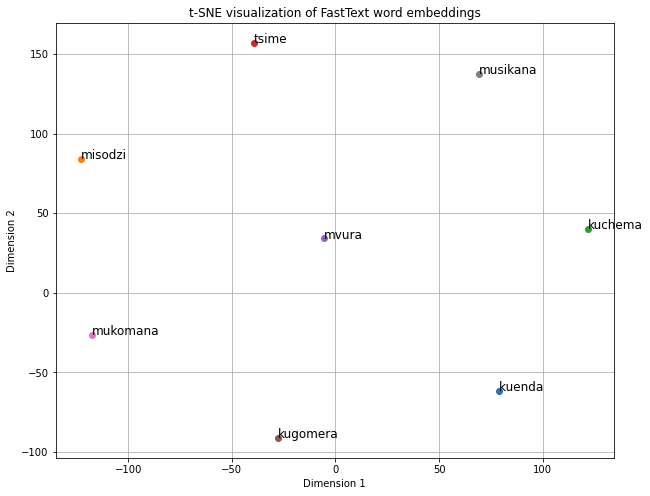

In [13]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Define a list of words to visualize
words = ['kuenda ', 'misodzi', 'kuchema', 'tsime', 'mvura', 'kugomera', 'mukomana', 'musikana']

# Extract the word vectors for the words
word_vectors = np.array([model.wv[word] for word in words])

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the 2D word vectors
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.01, word_vectors_2d[i, 1] + 0.01, word, fontsize=12)
plt.title('t-SNE visualization of FastText word embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
